# Preliminaries

## Notebook setup: synthetic data: 5-class, or binary setup

In [2]:
pygpstruct_location = '/home/sb358/pygpstruct-develop'

%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import sys
import matplotlib.pylab as plt
sys.path.append(pygpstruct_location + '/src/') # replace by your path to .py files
np.set_printoptions(precision=3)

The code in `hyperparameter_learning.py` provides 
* a `prepare_from_data` function to produce synthetic data consisting of single atoms (ie chains of length 1, if you will), together with their likelihood function and marginals computation function (both in Numba)
* a corresponding `learn_predict_gpstruct_wrapper`

These functions are used to produce all the datasets in this notebook.

## Checks: inspecting values of f, LL, Gram matrix

### Using 5-class synthetic data set

In [4]:
#check that the all places with a 1 in the Gram matrix correspond to identical outputs
indices = np.where(k_unary >1)
for i in range(100):
    if not data_train.Y[indices[1][i]] == data_train.Y[indices[0][i]]:
        print("oops")
    else: 
        #print("ok")
        pass

NameError: name 'k_unary' is not defined

In [136]:
# inspect log likelihood behaviour

ll_train = prepare_from_data_single_label(None)[0] # obtain training test LL function
f = np.ones((10+25)) # can vary binaries, won't change LL
f[:10] = np.array([[1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0]]).reshape((10))*1
# making value of correct f larger (ie multiply by constant), will increase LL
# subtracting a constant from all values of f won't change LL (cos factors out of numerator and denominator in LL) 
# when f is all 0 the LL is low, around -1.6
# when values of correct f's are very high, like 1000, LL is near to 0
ll_train(f)

-1.8096648831088959

In [137]:
f[0] = 10; ll_train(f) # should go up

-0.90501402478626414

In [138]:
f[0] = -10; ll_train(f) # should go down

-12.291138152592367

In [139]:
f[0] = 1; f[1] = 10; ll_train(f) # should go down

-9.9050920174550825

In [140]:
f[1] = -10; ll_train(f); #should go up

-1.6485087615871126

In [150]:
#check log likelihood and marginals calculation, must correspond to that of a multinomial
import numpy.testing

r = np.arange(5) # log potentials

marginals_multinomial = np.exp(r)/np.exp(r).sum()
marginals_from_function = marginals_function(log_node_pot=r, log_edge_pot=None, object_size=1, n_labels=5).squeeze()
numpy.testing.assert_array_equal(marginals_from_function, marginals_multinomial)

likelihoods_from_function = np.exp(np.array([log_likelihood(log_node_pot = r, log_edge_pot = None, dataset_Y_n = np.array([i]), object_size=1, n_labels=5) for i in range(5)]))
numpy.testing.assert_array_equal(likelihoods_from_function, marginals_multinomial)

### Using single feature synthetic data set

In [30]:
# inspection of f: effect of changing sign of f-coordinates on LL
n_labels=2
n_data=100
ll_train = prepare_from_data_single_label(None)[0] # obtain training LL function
ll_train_from_unary = lambda f_unary : ll_train(np.hstack((np.array(f_unary), np.random.randint(-50,50,(n_labels * n_labels))))) # won't depend on binaries
print(ll_train_from_unary(np.hstack((+1 * np.ones((n_data)), -1 * np.ones((n_data))))))
print(ll_train_from_unary(np.hstack((-1 * np.ones((n_data)), +1 * np.ones((n_data))))))

-112.692801104
-112.692801104


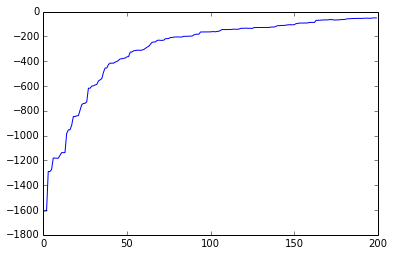

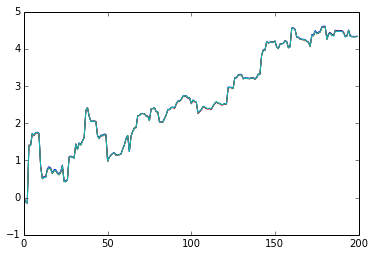

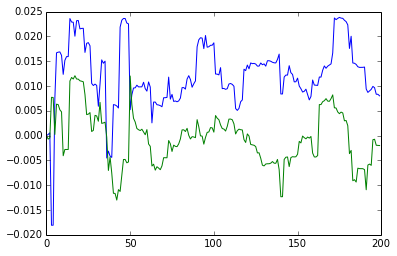

In [57]:
# expecting f to consist of 4 groups: + - - +

#print("posterior mean of f: %s" % str(history_f.mean(axis=0))) # observe the 4 groups + - - +
#print("posterior variance of f: %s" % str(history_f.var(axis=0)))
#print("last f: %s" % str(history_f[-1,:]))

# plot LL
plt.figure(0)
ax = plt.plot(history_ll)

# plot 4 different f coordinates: some go to >0, some to <0 values
plt.figure(1)
plt.plot(history_f[:,0])
plt.plot(history_f[:,50])
plt.plot(history_f[:,100])
plt.plot(history_f[:,150])

# plot difference of relevant f coordinates: to see whether f's are going to predict the test data correctly, look at their difference
# observe that the difference goes up
plt.figure(2)
plt.plot(history_f[:,0] - history_f[:,100])
plt.plot(- history_f[:,50] + history_f[:,150])


### Experiment with just the ESS sampler

In [201]:
import ess_k_sampler
import scipy

n_coordinates_f = 2
f = np.zeros((n_coordinates_f))
f = np.random.randn((n_coordinates_f))
normal_rv = scipy.stats.multivariate_normal(mean=np.array([0,1])) #np.ones((n_coordinates_f)))
logli =  lambda f : normal_rv.logpdf(f)

n_samples=1000
history_ll = np.empty((n_samples))
history_f = np.empty((n_samples, n_coordinates_f))

ll = logli(f)
for i in range(n_samples):
    if not np.mod(i,1000):
        print(' '.join(["%.2g " % v for v in f]))
        print(ll)
    history_f[i,:] = f
    history_ll[i] = ll
    (f, ll) = ess_k_sampler.ESS(f, logli, 1, np.eye(1), None, learn_predict.read_randoms)
    

-0.73  0.78 
-2.12590610094


posterior mean of f: [-0.004 -0.004 -0.005 -0.004 -0.004 -0.004 -0.004 -0.005 -0.004 -0.005
 -0.004 -0.005 -0.004 -0.005 -0.005 -0.005 -0.004 -0.005 -0.004 -0.004
 -0.004 -0.004 -0.004 -0.004 -0.004 -0.004 -0.004 -0.005 -0.004 -0.004
 -0.004 -0.005 -0.004 -0.004 -0.004 -0.005 -0.004 -0.005 -0.004 -0.004
 -0.004 -0.004 -0.004 -0.004 -0.004 -0.005 -0.004 -0.004 -0.005 -0.004
 -0.004 -0.004 -0.004 -0.004 -0.004 -0.004 -0.004 -0.004 -0.004 -0.005
 -0.005 -0.004 -0.004 -0.005 -0.004 -0.005 -0.004 -0.005 -0.004 -0.005
 -0.004 -0.005 -0.004 -0.004 -0.004 -0.004 -0.004 -0.004 -0.004 -0.004
 -0.004 -0.005 -0.004 -0.004 -0.004 -0.005 -0.005 -0.005 -0.004 -0.004
 -0.005 -0.004 -0.005 -0.004 -0.004 -0.004 -0.005 -0.004 -0.003 -0.004
  0.032  0.032  0.032  0.032  0.032  0.032  0.032  0.031  0.032  0.031
  0.031  0.032  0.032  0.031  0.032  0.032  0.032  0.032  0.031  0.032
  0.032  0.032  0.032  0.032  0.032  0.031  0.032  0.032  0.031  0.032
  0.031  0.032  0.032  0.032  0.032  0.031  0.031  0.031

(-1, 3.0)

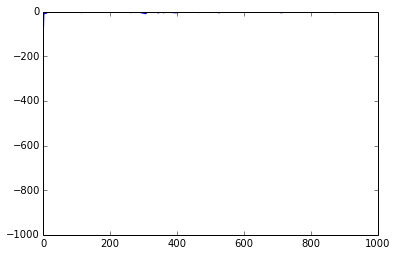

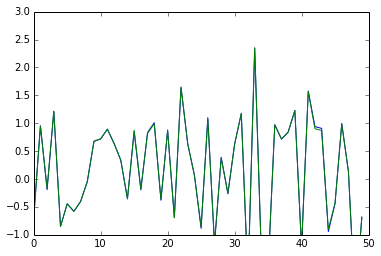

In [299]:
np.set_printoptions(precision=3)
print("posterior mean of f: %s" % str(history_f.mean(axis=0)))
print("posterior variance of f: %s" % str(history_f.var(axis=0)))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
ax = plt.plot(history_ll)
plt.ylim(bottom=-1000)
plt.figure(1)
plt.plot(history_f[:,0])
plt.plot(history_f[:,99])
plt.ylim(bottom=-1)


### Sanity check of jitter parameter, using single feature dataset, exponential ARD kernel

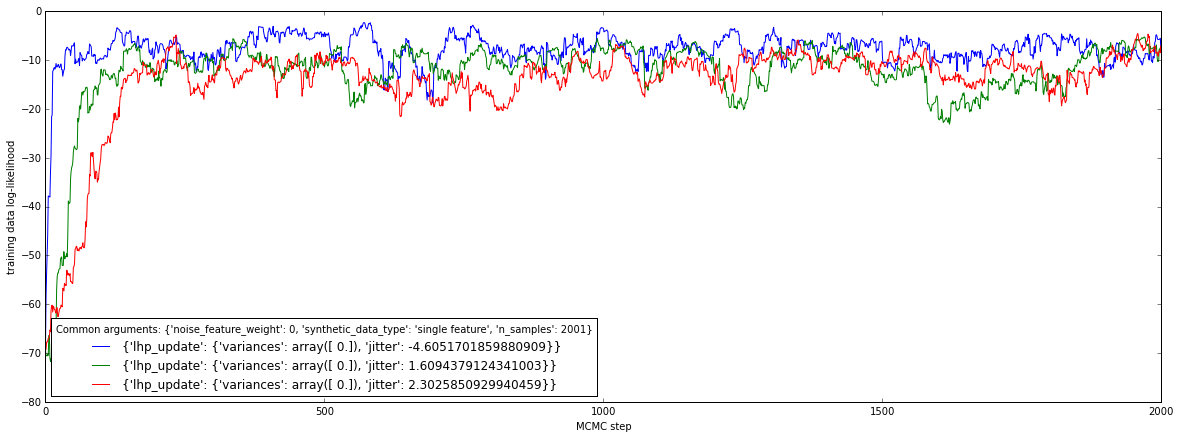

In [13]:
# single feature dataset: jitter level won't change results (cotnext: ARD kernel, variance 1)
plot_experiments(variable_arguments_dict = [
    {'lhp_update' : {'variances' : np.log(np.ones((1))), 'jitter' : np.log(0.01)}},
    {'lhp_update' : {'variances' : np.log(np.ones((1))), 'jitter' : np.log(5)}},
    {'lhp_update' : {'variances' : np.log(np.ones((1))), 'jitter' : np.log(10)}},
    ]);

Side note: *single feature + ARD kernel case*: large length scale will break learning; need small variance values.

Tentative explanation involves kernel values vs diagonal jitter:
* Small variance=> large kernel values => jitter does not change kernel matrix.
* Variance high => small kernel values => comparable in scale to jitter => training set LL stays low.  

(single feature => binary latent variables do not come into play)

# Hyperparameter sampling

## Synthetic data set: 5-class with noise

Under the "5-class" data model, the data looks like this:  
$(X_{0,\cdot}=[1., 0., 0., 0., 0.], y_0=0)$  
So we have 5 binary features: $X_{i,\cdot} \in \{0,1\}^5$, defined simply as the 1-of-K representation of the output value $y_i \in \{1..5\}$   

Under the "5-class with noise" data model, the input data looks like this:  
$X_{0,\cdot}=[1., 0., 0., 0., 0., 0.874, 0.952, 0.152, 0.065, 0.713]$  
The first five features are an indicator of the output class $y_0=0$ (we call them "signal features"), and the five last are random (here, uniformly distributed between 0 and 1; we call them "noise features").

To learn this data, a sensible approach is to somehow discard the noise features. An exponential ARD kernel does this by setting the variances corresponding to the noise features to $+\infty$ (we check this experimentally below to make sure our implementation is valid):

$k_\text{exponential}(\mathbf{x},\mathbf{x'}) = \exp(-\frac{1}{2 \ell ^2} \Vert \mathbf{x} - \mathbf{x'} \Vert ^2)$  
$k_\text{exponential ARD}(\mathbf{x},\mathbf{x'}) = \exp(-\frac{1}{2} \sum_i \frac{1}{\sigma_i ^2} ( \mathbf{x}_i - \mathbf{x'}_i ) ^2)$  

We want to check that hyperparameter learning with GPstruct will achieve exactly this effect, using this dataset and the exponential ARD kernel.

### Influence of 'noise' features when using exponential kernel

If we increase the weight of the noise features (with respect to the "signal" features, which are binary), the model becomes harder to learn for the squared exponential kernel. We can see this in a plot of the log-likelihood over the MCMC history, for different values of the noise weight. (Here an ARD kernel with all parameters fixed and equal to 1 is used, resulting in an SE kernel with lenght scale 1).

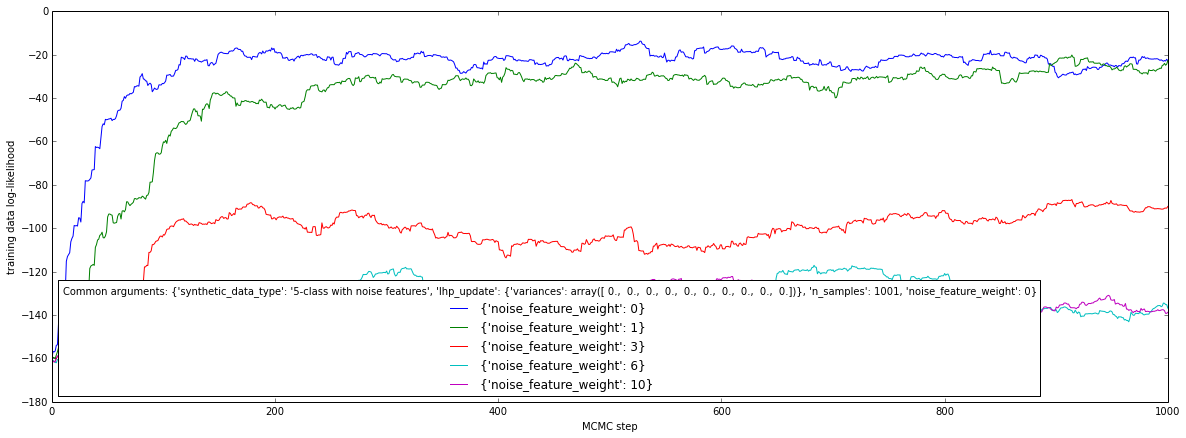

In [46]:
plot_experiments(common_arguments = {'n_samples' : 1001,
                                     'synthetic_data_type' : '5-class with noise features', 
                                     'lhp_update' : {'variances' : np.log(np.ones((10)))},
                                     },
        variable_arguments_dict = [
    {'noise_feature_weight' : 0},
    {'noise_feature_weight' : 1},
    {'noise_feature_weight' : 3},
    {'noise_feature_weight' : 6},
    {'noise_feature_weight' : 10},
    ]);

Log-likelihood plots for different datasets, obtained by varying the scale of the noise features ("noise weight"). In all experiments, the squared exponential kernel is used.

### Sanity check of the exponential-ARD kernel implementation: Check ARD exponential can behave like exponential with right hyperparameters

Using the "right" ARD variances (namely constant for the relevant features, $+\infty$ for the noise features) will correct the issue (in the high noise cases): in fact this is then equivalent to a simple exponential kernel with only the relevant features. **Below, the LL at then end of the run is equal in both experiments (-22.995).** This suggests that the ARD implementation is correct.

In [ ]:
import prepare_from_data_synthetic
import kernels

In [14]:
n_samples=1001
!rm -rf /tmp/pygpstruct/
prepare_from_data_synthetic.learn_predict_gpstruct_wrapper(
    synthetic_data_type = '5-class',
    kernel=kernels.kernel_exponential,
    lhp_init={'unary': np.log(1), 'binary': np.log(0.01), 'length_scale': np.log(1), 'jitter': np.log(1e-4), 'variances': np.array([1])},
    n_samples=n_samples, n_data = 100, prediction_thinning=1000)

#TODO MUST FIX syntax after example above (already fixed)
n_samples=1001
!rm -rf /tmp/pygpstruct/
learn_predict_gpstruct_wrapper(
    synthetic_data_type = '5-class with noise features',
    kernel=kernels.kernel_exponential_ard,
    noise_feature_weight=10,
    lhp_update = {'variances' : np.log([1,1,1,1,1,np.PINF, np.PINF, np.PINF, np.PINF, np.PINF])},
    n_samples=n_samples, n_data = 100, prediction_thinning=1000);

2015-01-09 12:15:48,558Z - INFO - learn_predict_gpstruct started with arguments: {'prepare_from_data': <function learn_predict_gpstruct_wrapper.<locals>.<lambda> at 0x7fbc8b847d90>, 'lhp_update': {'length_scale': 0.0}, 'n_f_star': 0, 'n_samples': 1001, 'stop_check': None, 'result_prefix': '/tmp/pygpstruct/', 'random_seed': 0, 'prediction_thinning': 1000, 'hp_sampling_thinning': 1, 'hp_sampling_mode': None, 'console_log': True, 'kernel': <function kernel_exponential_unary at 0x7fbc91c32158>, 'prior': 1, 'prediction_verbosity': None, 'hp_debug': True}
2015-01-09 12:15:48,560Z - DEBUG - prepare kernel matrices
2015-01-09 12:15:48,563Z - DEBUG - start MCMC chain
2015-01-09 12:15:48,573Z - INFO - ESS it 0 -- LL train | last f = -156.77 -- test set error | last f = 0.6 -- LL test | last f = -156.76 -- test set error (marginalized over f's)= 0.6 -- average per-atom negative log posterior marginals = 0.8 -- lhp = {'unary': 0.0, 'jitter': -9.2103403719761818, 'binary': -4.6051701859880909, 'len

## Hyperparameter sampling methods

Hyperparameter prior: for all experiments below, the prior over ARD variance hyperparameters is of the form

$\log h \sim U(\log 10^{-3}, \log 10^{2})$

This was chosen as a relatively flat prior, and to prevent extreme values of the hyperparameters (which lead to non-positive definite kernel matrices to machine precision).

In [4]:
%run /home/sb358/pygpstruct-develop/src/kernels # runs unit tests

In [1]:
# ==> BEFORE DOING THIS, start the cluster !

# initialize load balanced view
import ipyparallel

c = ipyparallel.Client()
print(c.ids)
lbview = c.load_balanced_view() # rerun until all cluster ids show up

import os
pids = c[:].apply_async(os.getpid).get_dict()
print(pids)

[0, 1, 2, 3]
{0: 2775, 1: 2776, 2: 2790, 3: 2792}


In [2]:
%%px --local
pygpstruct_location = '/xvdb/pygpstruct'

%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import sys
import matplotlib.pylab as plt
sys.path.append(pygpstruct_location + '/src/') # replace by your path to .py files
np.set_printoptions(precision=3)

import util_experiments # while changing code here, to make sure it autoreloads

/xvdb/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/xvdb/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
[stderr:0] 
/xvdb/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/xvdb/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is build

## sampling method = prior whitening

Experiment with noise features with large weight (10), hp learning (prior whitening method), collecting values of the hp over the MCMC chain:

[{'hp_sampling_thinning': 10, 'noise_feature_weight': 0, 'hp_sampling_mode': 'prior whitening', 'n_samples': 5000, 'result_prefix': '/tmp/pygpstruct_2156257202523924513/', 'synthetic_data_type': '5-class with noise features', 'console_log': False}, {'hp_sampling_thinning': 10, 'noise_feature_weight': 10, 'hp_sampling_mode': 'prior whitening', 'n_samples': 5000, 'result_prefix': '/tmp/pygpstruct_2156297884454152225/', 'synthetic_data_type': '5-class with noise features', 'console_log': False}, {'hp_sampling_thinning': 10, 'noise_feature_weight': 0, 'hp_sampling_mode': None, 'n_samples': 5000, 'result_prefix': '/tmp/pygpstruct_2156331419558799393/', 'synthetic_data_type': '5-class with noise features', 'console_log': False}, {'hp_sampling_thinning': 10, 'noise_feature_weight': 10, 'hp_sampling_mode': None, 'n_samples': 5000, 'result_prefix': '/tmp/pygpstruct_2156363305396004897/', 'synthetic_data_type': '5-class with noise features', 'console_log': False}]
CPU times: user 836 ms, sys: 56

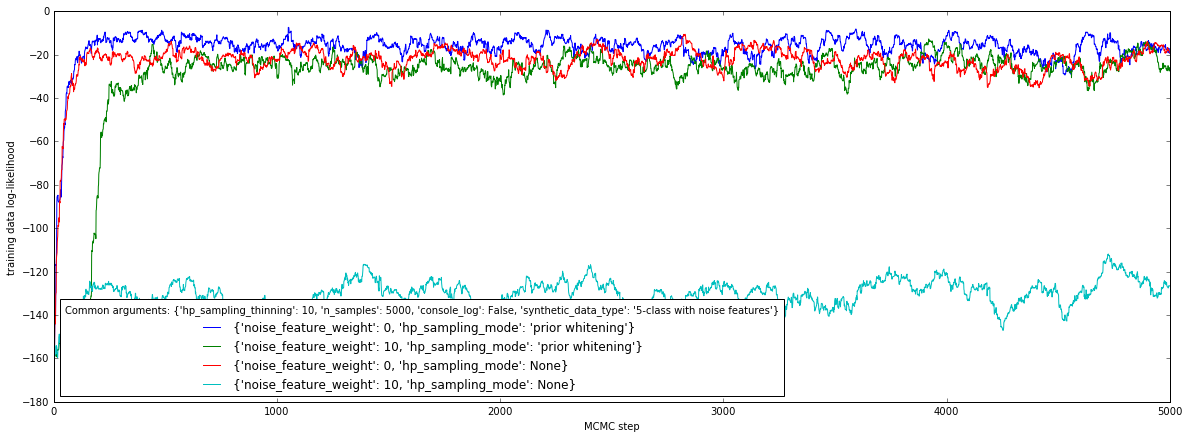

In [14]:
%%time
n_samples = 5000
(history_list, default_common_arguments, variable_arguments_list) = util_experiments.run_experiments(
    lbview=lbview, require_output=True, map_async=False,
    common_arguments = {
        'synthetic_data_type' : '5-class with noise features', 
        'n_samples' : n_samples,
        'hp_sampling_thinning' :10,
        'console_log': False
    },
    variable_arguments_list = [ 
        {'hp_sampling_mode' : 'prior whitening', 'noise_feature_weight' : 0},
        {'hp_sampling_mode' : 'prior whitening', 'noise_feature_weight' : 10},
        {'hp_sampling_mode' : None, 'noise_feature_weight' : 0}, 
        {'hp_sampling_mode' : None, 'noise_feature_weight' : 10}, 
    ])
util_experiments.plot_experiments(history_list, default_common_arguments, variable_arguments_list, 
                                  savefig_file = '/xvdb/tmp/hp learning - synthetic data - pw lik plot.png')

**Interpretation: works as expected** 

For noise_feature_weight = 10, and prior whitening, plot the hyperparameter histogram over the MCMC history. 
This allows us to inspect the posterior distribution of the hyperparameters and check that the noise-feature-related ARD variance hp are tending towards $+\infty$.

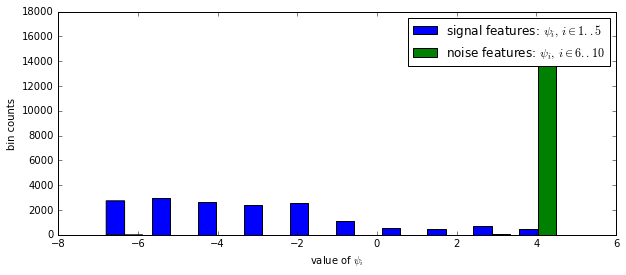

In [15]:
interesting_configuration_index = 1 #{'hp_sampling_mode' : 'prior whitening', 'noise_feature_weight' : 10},
burnin=n_samples // 3
history_hp_extract = history_list[interesting_configuration_index][1] # 1 stands for hp in (ll, hp) tuple

plt.figure(0, figsize=(10,4))
history_hp_relevant = history_hp_extract[burnin:,:5].reshape(((n_samples - burnin)*5))
history_hp_noise = history_hp_extract[burnin:,5:].reshape(((n_samples - burnin)*5))
#history_hp_relevant = history_hp_extract[:,:5].reshape((n_samples*5))
#history_hp_noise = history_hp_extract[:,5:].reshape((n_samples*5))
history_hp_reordered = np.vstack((history_hp_relevant, history_hp_noise)).T # all signal resp noise hp go into the same bin
plt.hist(history_hp_reordered, label=['signal features: $\psi_i, \, i \in {1..5}$',
                                      'noise features: $\psi_i, \, i \in {6..10}$'])
plt.ylabel('bin counts')
plt.xlabel('value of $\psi_i$')
plt.legend();
plt.savefig('/xvdb/tmp/hp learning - synthetic data - pw sample histogram.png', bbox_inches='tight')

The ARD variance hyperparameters corresponding to noise features tend to adopt large values (which reduces the impact of noise features, increasing the likelihood), while the ones corresponding to signal features tend to be small.

** Using prior whitening, the posterior distribution of hyperparameters "looks convincing".**

## sampling method = update_theta_simple, ie update $\theta | f$ by slice sampling

[{'noise_feature_weight': 10, 'synthetic_data_type': '5-class with noise features', 'n_samples': 5000, 'result_prefix': '/tmp/pygpstruct_1146464624063336565/', 'hp_sampling_mode': None, 'console_log': False}, {'noise_feature_weight': 10, 'hp_sampling_thinning': 10, 'synthetic_data_type': '5-class with noise features', 'n_samples': 5000, 'result_prefix': '/tmp/pygpstruct_1146506955261005941/', 'hp_sampling_mode': 'slice sample theta', 'console_log': False}, {'noise_feature_weight': 10, 'hp_sampling_thinning': 100, 'synthetic_data_type': '5-class with noise features', 'n_samples': 5000, 'result_prefix': '/tmp/pygpstruct_1146539390854025333/', 'hp_sampling_mode': 'slice sample theta', 'console_log': False}, {'noise_feature_weight': 10, 'hp_sampling_thinning': 1000, 'synthetic_data_type': '5-class with noise features', 'n_samples': 5000, 'result_prefix': '/tmp/pygpstruct_1146570726935416949/', 'hp_sampling_mode': 'slice sample theta', 'console_log': False}]


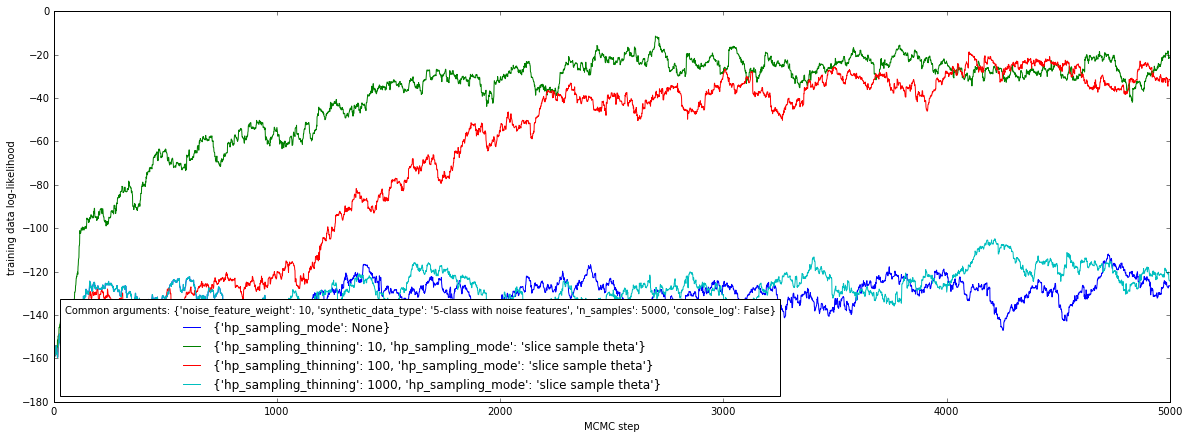

In [4]:
n_samples = 5000
(history_list, default_common_arguments, variable_arguments_list) = util_experiments.run_experiments(
                                    lbview=lbview, require_output=True, map_async=False,
                                    common_arguments = {'synthetic_data_type' : '5-class with noise features', 
                                     'noise_feature_weight' : 10,
                                     'n_samples' : n_samples,
                                     'console_log': False
                                    },
                                                 variable_arguments_list = [ 
                                                    {'hp_sampling_mode' : None}, 
                                                    {'hp_sampling_mode' : 'slice sample theta', 'hp_sampling_thinning' :10,},
                                                    {'hp_sampling_mode' : 'slice sample theta', 'hp_sampling_thinning' :100,},
                                                    {'hp_sampling_mode' : 'slice sample theta', 'hp_sampling_thinning' :1000,},
                                                 ])
util_experiments.plot_experiments(history_list, default_common_arguments, variable_arguments_list, 
                                  savefig_file = '/xvdb/tmp/hp learning - synthetic data - ss lik plot.png')

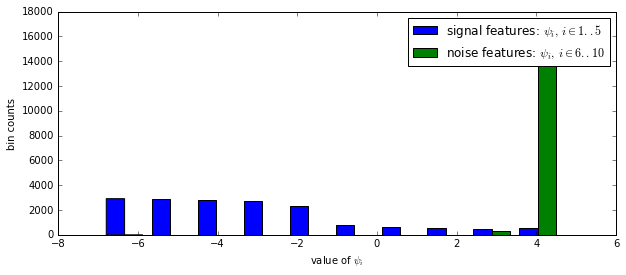

In [6]:
burnin=n_samples // 3
interesting_configuration_index = 1 # {'hp_sampling_mode' : 'slice sample theta', 'hp_sampling_thinning' :10,},
history_hp_extract = history_list[interesting_configuration_index][1] # 1 stands for hp in (ll, hp) tuple

plt.figure(0, figsize=(10,4))
history_hp_relevant = history_hp_extract[burnin:,:5].reshape(((n_samples - burnin)*5))
history_hp_noise = history_hp_extract[burnin:,5:].reshape(((n_samples - burnin)*5))
#history_hp_relevant = history_hp_extract[:,:5].reshape((n_samples*5))
#history_hp_noise = history_hp_extract[:,5:].reshape((n_samples*5))
history_hp_reordered = np.vstack((history_hp_relevant, history_hp_noise)).T # all signal resp noise hp go into the same bin
plt.hist(history_hp_reordered, label=['signal features: $\psi_i, \, i \in {1..5}$',
                                      'noise features: $\psi_i, \, i \in {6..10}$'])
plt.ylabel('bin counts')
plt.xlabel('value of $\psi_i$')
plt.legend();
plt.savefig('/xvdb/tmp/hp learning - synthetic data - ss sample histogram.png', bbox_inches='tight')

** Interpretation: works as expected **
Using slice sampling theta and "noise feature weight"=10, the "noise feature" ARD variances corresponding tend to infinity: hence the posterior hyperparameters seem to have been learnt. This is also visible in the LL path, where hp sampling every 10 or 100 steps gives higher LL than every 1000 or not at all.


## sampling method = surrogate data

In [ ]:
(history_list, default_common_arguments, variable_arguments_list) = util_experiments.run_experiments(
                                    lbview=lbview,
                                    common_arguments = {'synthetic_data_type' : '5-class with noise features', 
                                     'noise_feature_weight' : 10,
                                     'n_samples' : 5001,
                                    },
                 variable_arguments_list = [
    {'hp_sampling_mode' : None}, 
    {'hp_sampling_mode' : 'surrogate data', 'hp_sampling_thinning' :1,},
    {'hp_sampling_mode' : 'surrogate data', 'hp_sampling_thinning' :3,},
    {'hp_sampling_mode' : 'surrogate data', 'hp_sampling_thinning' :10,},
    {'hp_sampling_mode' : 'surrogate data', 'hp_sampling_thinning' :100,},
    {'hp_sampling_mode' : 'surrogate data', 'hp_sampling_thinning' :1000,},
    ])
util_experiments.plot_experiments(history_list, default_common_arguments, variable_arguments_list);

TODO, also plot the hyperp posterior histogram

## all 3 methods compared

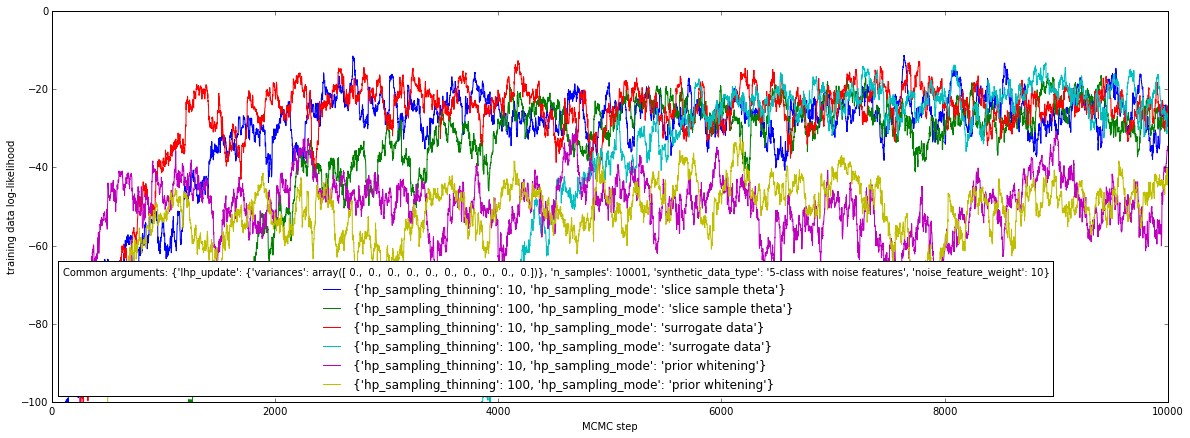

In [111]:
%%time
(history_list, default_common_arguments, variable_arguments_list) = util_experiments.run_experiments(
                                    lbview=lbview,
                                    common_arguments = {'synthetic_data_type' : '5-class with noise features', 
                                     'noise_feature_weight' : 10,
                                     'n_samples' : 10001,
                                    },
                 variable_arguments_list = [
#    {'hp_sampling_mode' : None}, 
    {'hp_sampling_mode' : 'slice sample theta', 'hp_sampling_thinning' :10,}, # BUG: slice sampling shrinks slice to one point but can't get back on slice
    {'hp_sampling_mode' : 'slice sample theta', 'hp_sampling_thinning' :100,}, # BUG: slice sampling shrinks slice to one point but can't get back on slice
#    {'hp_sampling_mode' : 'slice sample theta', 'hp_sampling_thinning' :1000,},
    {'hp_sampling_mode' : 'surrogate data', 'hp_sampling_thinning' :10,}, # oscillates widely, messes up plot 
    {'hp_sampling_mode' : 'surrogate data', 'hp_sampling_thinning' :100,},
#    {'hp_sampling_mode' : 'surrogate data', 'hp_sampling_thinning' :1000,},
    {'hp_sampling_mode' : 'prior whitening', 'hp_sampling_thinning' :10,},
    {'hp_sampling_mode' : 'prior whitening', 'hp_sampling_thinning' :100,},
#    {'hp_sampling_mode' : 'prior whitening', 'hp_sampling_thinning' :1000,},
    ])
util_experiments.plot_experiments(history_list, default_common_arguments, variable_arguments_list, y_min=-100);